In [22]:
import pandas as pd # import and manage datasets
import numpy as np # mathematic library
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

In [11]:
df_patents_region = pd.read_csv("patents-filed-for-renewables.csv")
df_patents_solar = df_patents_region['Solar PV'] + df_patents_region['Solar Thermal'] + df_patents_region['Solar PV-Thermal Hybrid']
df_patents_region['Solar_total'] = df_patents_solar

In [12]:
df_patents_region

,Entity,Code,Year,Wind,Solar PV,Solar Thermal,Solar PV-Thermal Hybrid,Geothermal,Hydropower,Marine,Other,Bioenergy,Solar_total
0,World,OWID_WRL,2000,1885,3060,2100,660,128,918,235,35,1879,5820
1,World,OWID_WRL,2001,2274,3222,2221,691,188,819,263,12,1820,6134
2,World,OWID_WRL,2002,2936,3113,2549,614,234,984,237,29,2007,6276
3,World,OWID_WRL,2003,3185,3616,2416,818,242,1072,251,18,2090,6850
4,World,OWID_WRL,2004,3248,4024,2808,749,254,1234,514,31,2323,7581
5,World,OWID_WRL,2005,3685,4749,3028,872,253,1252,553,11,2844,8649
6,World,OWID_WRL,2006,4254,5816,4396,1182,352,1594,668,29,4081,11394
7,World,OWID_WRL,2007,6192,8085,5635,1435,503,2039,924,61,5898,15155
8,World,OWID_WRL,2008,8411,11600,8025,1943,578,2573,1064,53,7128,21568
9,World,OWID_WRL,2009,11180,17152,10530,2419,897,3249,1485,62,7984,30101


In [14]:
y1 = list(df_patents_region['Wind'])
x1 = list(df_patents_region['Year'])

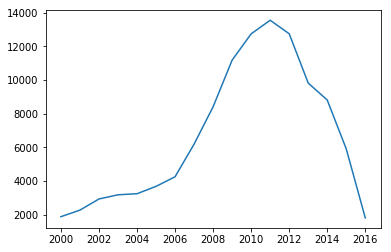

In [17]:
pyplot.plot(x1, y1)  

In [18]:
z1 = pd.DataFrame(x1, columns = ['Year'])

In [19]:
z1['pat_wind'] = y1

In [20]:
z1 = z1.set_index('Year')

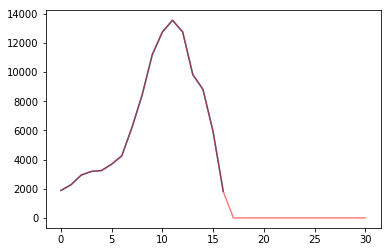

In [55]:
X = z1.values
X = [int(x) for x in X]
history = [int(x) for x in X]
predictions = list(history)

for t in range(17,31):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = int(output[0])
    if yhat < 0:
        yhat = 0
    predictions.append(yhat)
    history.append(yhat)
# plot
pyplot.plot(X)
pyplot.plot(predictions, color='red', alpha=0.5)
pyplot.show()

In [56]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -240.017
Method:                       css-mle   S.D. of innovations            938.486
Date:                Wed, 20 Nov 2019   AIC                            486.034
Time:                        21:41:11   BIC                            490.136
Sample:                             1   HQIC                           487.319
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.7597    597.322     -0.040      0.969   -1194.488    1146.969
ar.L1.D.y      0.7322      0.116      6.297      0.000       0.504       0.960
                                    Roots           

In [57]:
df_patent = pd.DataFrame(list(range(2000,2031)), columns = ['Year'])

In [58]:
df_patent['patent_wind'] = predictions

In [59]:
y2 = list(df_patents_region['Solar_total'])
x2 = list(df_patents_region['Year'])

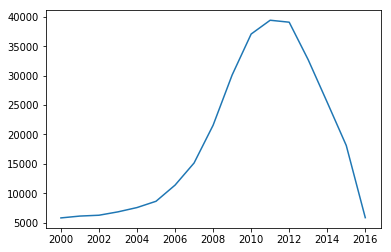

In [60]:
pyplot.plot(x2, y2)  

In [61]:
z2 = pd.DataFrame(x2, columns = ['Year'])

In [62]:
z2['pat_solar'] = y2

In [63]:
z2 = z2.set_index('Year')

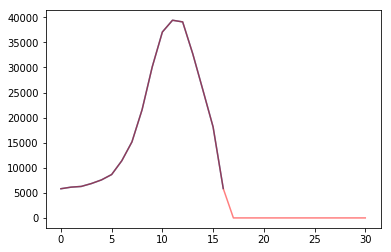

In [64]:
X = z2.values
X = [int(x) for x in X]
history = [int(x) for x in X]
predictions = list(history)

for t in range(17,31):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = int(output[0])
    if yhat < 0:
        yhat = 0
    predictions.append(yhat)
    history.append(yhat)
# plot
pyplot.plot(X)
pyplot.plot(predictions, color='red', alpha=0.5)
pyplot.show()

In [65]:
df_patent['patent_solar'] = predictions

In [32]:
df_patent.head()

,Year,patent_wind
0,2000,1885
1,2001,2274
2,2002,2936
3,2003,3185
4,2004,3248
